In [70]:
import os
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
stored_folder = Path(os.path.abspath('')).parent / "data" / "raw" / "recipes.csv"
df_recipe = pd.read_csv(stored_folder,encoding="UTF-8")

In [72]:
df_recipe

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."


In [73]:
name = df_recipe["Name"]
cleaned_name = name.apply(lambda s: s.translate(str.maketrans('','', string.punctuation + u'\xa0')))
cleaned_name = cleaned_name.apply(lambda s: s.lower())
cleaned_name = cleaned_name.apply(lambda s: s.translate(str.maketrans(string.whitespace, ' ' * len(string.whitespace), '')))
cleaned_name = cleaned_name.replace('', None)
df_recipe["Name"] = cleaned_name

In [74]:
df_recipe

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,lowfat berry blue frozen dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,best lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,cabbage soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522512,541379,megs fresh ginger gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,roast prime rib au poivre with mixed peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,kirshwasser ice cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,quick easy asian cucumber salmon rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."


In [75]:
cook_process = df_recipe["RecipeInstructions"]
cleaned_cook_process = cook_process.replace('character(0)', None).fillna('')
cleaned_cook_process = cleaned_cook_process.replace('""', None).fillna('')
cleaned_cook_process = cleaned_cook_process.apply(lambda s: s.replace('c(', '').replace(')', ''))
cleaned_cook_process = cleaned_cook_process.apply(lambda s: s.replace('"', ''))
cleaned_cook_process = cleaned_cook_process.apply(lambda s: s.lower())

df_recipe["RecipeInstructions"] = cleaned_cook_process
df_recipe["RecipeInstructions"]

0         toss 2 cups berries with sugar., let stand for...
1         soak saffron in warm milk for 5 minutes and pu...
2         into a 1 quart jar with tight fitting lid, put...
3         drain the tofu, carefully squeezing out excess...
4         mix everything together and bring to a boil., ...
                                ...                        
522512    preheat oven to 350&deg;f grease an 8x8 cake p...
522513    position rack in center of oven and preheat to...
522514    heat half and half and heavy cream to a simmer...
522515    in a small bowl, combine mayo and wasabi paste...
522516    mix sausage, panko, egg yolk and wocestershire...
Name: RecipeInstructions, Length: 522517, dtype: object

In [76]:
ingredient = df_recipe["RecipeIngredientParts"]
cleaned_ingredient = df_recipe["RecipeIngredientParts"].replace('character(0)', None).fillna('')
cleaned_ingredient = cleaned_ingredient.apply(lambda s: s.replace('c(', '').replace(')', ''))
cleaned_ingredient = cleaned_ingredient.apply(lambda s: s.replace('"', ''))
cleaned_ingredient = cleaned_ingredient.apply(lambda s: s.lower())
cleaned_ingredient = cleaned_ingredient.replace('', None)
df_recipe["RecipeIngredientParts"] = cleaned_ingredient
df_recipe["RecipeIngredientParts"]

0         blueberries, granulated sugar, vanilla yogurt,...
1         saffron, milk, hot green chili peppers, onions...
2         sugar, lemons, rind of, lemon, zest of, fresh ...
3         extra firm tofu, eggplant, zucchini, mushrooms...
4         plain tomato juice, cabbage, onion, carrots, c...
                                ...                        
522512    fresh ginger, unsalted butter, dark brown suga...
522513    dijon mustard, garlic, peppercorns, shallot, c...
522514            half-and-half, heavy cream, brandy, sugar
522515    wasabi paste, dill, english cucumber, smoked s...
522516    hard-boiled eggs, breakfast sausage, panko bre...
Name: RecipeIngredientParts, Length: 522517, dtype: object

In [77]:
cleaned_images = []
for value in df_recipe['Images']:
    # Convert value to string
    value_str = str(value)
    # Remove leading and trailing whitespace
    value_str = value_str.strip()
    # Replace 'character(0)' with None
    value_str = value_str.replace('character(0)', 'None')
    # Extract the first URL from the string if it starts with 'c("'
    if value_str.startswith('c("'):
        first_url = value_str.split('", "')[0][3:].strip('"')
        value_str = first_url
    else:
        value_str = None
    cleaned_images.append(value_str)

# Update the 'Images' column with cleaned data
df_recipe['Images'] = cleaned_images


In [78]:
df_recipe = df_recipe.dropna()

In [79]:
df_recipe['Images']

3         https://img.sndimg.com/food/image/upload/w_555...
16        https://img.sndimg.com/food/image/upload/w_555...
121       https://img.sndimg.com/food/image/upload/w_555...
139       https://img.sndimg.com/food/image/upload/w_555...
170       https://img.sndimg.com/food/image/upload/w_555...
                                ...                        
520241    https://img.sndimg.com/food/image/upload/w_555...
520255    https://img.sndimg.com/food/image/upload/w_555...
520353    https://img.sndimg.com/food/image/upload/w_555...
520596    https://img.sndimg.com/food/image/upload/w_555...
521418    https://img.sndimg.com/food/image/upload/w_555...
Name: Images, Length: 8470, dtype: object

In [80]:
df_recipe

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
3,41,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"drain the tofu, carefully squeezing out excess..."
16,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,4.9,69.8,534.8,67.0,1.6,47.9,5.0,12.0,1 bundt,"beat together the eggs, oil, and white sugar. ..."
121,168,anzac biscuits,1775,kitka9,PT15M,PT10M,PT25M,1999-08-19T05:14:00Z,These biscuits (cookies in America) are called...,https://img.sndimg.com/food/image/upload/w_555...,...,6.8,22.3,143.4,25.0,1.5,10.9,2.2,12.0,12-24 cookies,"mix oats, flour, sugar and coconut together., ..."
139,187,chickenfried steak with cracked pepper gravy,275742,bugsbunnyfan,PT15M,PT1H20M,PT1H35M,1999-09-12T06:23:00Z,Make and share this Chicken-Fried Steak With C...,https://img.sndimg.com/food/image/upload/w_555...,...,34.5,241.1,1017.8,46.0,1.9,0.3,32.9,4.0,3 cups,"prepare the flour spice by blending the flour,..."
170,220,chocolate zucchini bread,1604,itsjustme,PT1H,PT25M,PT1H25M,1999-08-07T09:18:00Z,Make and share this Chocolate Zucchini Bread r...,https://img.sndimg.com/food/image/upload/w_555...,...,3.7,55.8,392.8,67.6,2.7,40.9,6.3,10.0,2 loaves,"in a mixing bowl, beat eggs, oil, sugar and va..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520241,538941,belgian fries with andalouse sauce,400708,Bonnie G 2,PT20M,PT20M,PT40M,2019-06-20T13:54:00Z,Belgian fries are cooked twice for a soft midd...,https://img.sndimg.com/food/image/upload/w_555...,...,12.0,0.0,93.6,24.8,3.2,1.6,2.9,10.0,3 Pounds,"sauce:, stir mayonnaise, tomato paste, red oni..."
520255,538955,cuban bread,400708,Bonnie G 2,PT18M,PT25M,PT43M,2019-06-24T13:48:00Z,"I enjoy making all kinds of bread, and while s...",https://img.sndimg.com/food/image/upload/w_555...,...,5.2,12.2,1169.2,98.7,4.2,2.4,14.1,4.0,4 Sandwich Rolls,"grease a large bowl, and set aside., take a sm..."
520353,539056,belgian tomato meatball soup tomatensoep met b...,65502,Nif_H,PT1H,PT30M,PT1H30M,2019-07-14T15:34:00Z,Traditional Meatball Soup - a classic Belgian...,https://img.sndimg.com/food/image/upload/w_555...,...,4.5,22.5,378.0,20.7,3.4,10.8,8.5,4.0,1 pot,add the butter to a large and high pan. place ...
520596,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,10.9,120.6,836.2,22.3,0.8,19.4,33.2,4.0,1 tenderloin,for the bacon-onion jam: heat the oil in a cas...


In [81]:
output_dir = Path(os.path.abspath('')).parent / "data" / "processed"
output_file = open(str(output_dir) + "/cleaned_df.pkl", "wb")
pickle.dump(df_recipe, output_file)

In [82]:
review_folder = Path(os.path.abspath('')).parent / "data" / "raw" / "reviews.csv"
df_review = pd.read_csv(review_folder, encoding='UTF-8')

In [83]:
df_review

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z
...,...,...,...,...,...,...,...,...
1401977,2090339,139499,2002080368,terrylbiggs,2,I was disappointed. I couldn't wait to make th...,2020-12-27T23:57:54Z,2020-12-27T23:57:54Z
1401978,2090340,148484,41805321,rogerberry,5,Nothing to drain. And I don’t heat up the liqu...,2020-12-28T00:44:42Z,2020-12-28T00:44:42Z
1401979,2090341,264191,2002901848,Reiketsukan 6.,5,Good base recipe for someone to start with. I ...,2020-12-28T01:04:43Z,2020-12-28T01:04:43Z
1401980,2090345,411791,2002901938,Sue M.,5,Thank you so much for this amazing recipe! I l...,2020-12-28T03:07:10Z,2020-12-28T03:07:10Z


In [84]:
raw_review = df_review['Review'].astype(str)
cleaned_review = raw_review.apply(lambda s: s.translate(str.maketrans('','', string.punctuation + u'\xa0')))
cleaned_review = cleaned_review.apply(lambda s: s.lower())
cleaned_review

0                better than any you can get at a restaurant
1          i cut back on the mayo and made up the differe...
2          i think i did something wrong because i could ...
3          easily the best i have ever had  juicy flavorf...
4                                          an excellent dish
                                 ...                        
1401977    i was disappointed i couldnt wait to make thes...
1401978    nothing to drain and i don’t heat up the liqui...
1401979    good base recipe for someone to start with i q...
1401980    thank you so much for this amazing recipe i li...
1401981    i cant say enough about this recipe the best p...
Name: Review, Length: 1401982, dtype: object

In [85]:
raw_review

0               better than any you can get at a restaurant!
1          I cut back on the mayo, and made up the differ...
2          i think i did something wrong because i could ...
3          easily the best i have ever had.  juicy flavor...
4                                         An excellent dish.
                                 ...                        
1401977    I was disappointed. I couldn't wait to make th...
1401978    Nothing to drain. And I don’t heat up the liqu...
1401979    Good base recipe for someone to start with. I ...
1401980    Thank you so much for this amazing recipe! I l...
1401981    I can't say enough about this recipe.... the b...
Name: Review, Length: 1401982, dtype: object

In [86]:
df_review

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z
...,...,...,...,...,...,...,...,...
1401977,2090339,139499,2002080368,terrylbiggs,2,I was disappointed. I couldn't wait to make th...,2020-12-27T23:57:54Z,2020-12-27T23:57:54Z
1401978,2090340,148484,41805321,rogerberry,5,Nothing to drain. And I don’t heat up the liqu...,2020-12-28T00:44:42Z,2020-12-28T00:44:42Z
1401979,2090341,264191,2002901848,Reiketsukan 6.,5,Good base recipe for someone to start with. I ...,2020-12-28T01:04:43Z,2020-12-28T01:04:43Z
1401980,2090345,411791,2002901938,Sue M.,5,Thank you so much for this amazing recipe! I l...,2020-12-28T03:07:10Z,2020-12-28T03:07:10Z


In [87]:
df_review = df_review.rename(columns={'RecipeId': 'recipe_id' })
df_review = df_review.rename(columns={'AuthorName': 'reviewer_name'})
df_review = df_review.rename(columns={'ReviewId':'review_id'})
df_review =df_review.rename(columns={'Rating': 'rating'})
df_review = df_review.rename(columns={'AuthorId': 'user_id'})

In [88]:
df_review

,review_id,recipe_id,user_id,reviewer_name,rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z
...,...,...,...,...,...,...,...,...
1401977,2090339,139499,2002080368,terrylbiggs,2,I was disappointed. I couldn't wait to make th...,2020-12-27T23:57:54Z,2020-12-27T23:57:54Z
1401978,2090340,148484,41805321,rogerberry,5,Nothing to drain. And I don’t heat up the liqu...,2020-12-28T00:44:42Z,2020-12-28T00:44:42Z
1401979,2090341,264191,2002901848,Reiketsukan 6.,5,Good base recipe for someone to start with. I ...,2020-12-28T01:04:43Z,2020-12-28T01:04:43Z
1401980,2090345,411791,2002901938,Sue M.,5,Thank you so much for this amazing recipe! I l...,2020-12-28T03:07:10Z,2020-12-28T03:07:10Z


In [89]:
merged_df = df_recipe.merge(df_review, left_on="RecipeId", right_on="recipe_id" ,how='inner')

In [90]:
merged_df

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,RecipeYield,RecipeInstructions,review_id,recipe_id,user_id,reviewer_name,rating,Review,DateSubmitted,DateModified
0,41,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,...,4 kebabs,"drain the tofu, carefully squeezing out excess...",48870,41,57256,Theresa P,5,I thought this was very GOOD! ANYONE who is af...,2003-04-13T17:30:17Z,2003-04-13T17:30:17Z
1,41,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,...,4 kebabs,"drain the tofu, carefully squeezing out excess...",797321,41,1060485,allyop135,4,This was SOO good! the marinade was awesome!! ...,2009-01-26T19:35:09Z,2009-01-26T19:35:09Z
2,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,1 bundt,"beat together the eggs, oil, and white sugar. ...",74639,54,86318,mianbao,3,"I made this according to the recipe, with no s...",2003-11-08T18:13:52Z,2003-11-08T18:13:52Z
3,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,1 bundt,"beat together the eggs, oil, and white sugar. ...",343405,54,175492,Chabear01,5,Made this up for the Thanksgiving dessert tabl...,2006-12-06T19:15:55Z,2006-12-06T19:15:55Z
4,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,1 bundt,"beat together the eggs, oil, and white sugar. ...",515597,54,236470,Bluenoser,5,Must say i am not a big carrot cake fan but...,2007-11-14T17:44:53Z,2007-11-14T17:44:53Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90615,539056,belgian tomato meatball soup tomatensoep met b...,65502,Nif_H,PT1H,PT30M,PT1H30M,2019-07-14T15:34:00Z,Traditional Meatball Soup - a classic Belgian...,https://img.sndimg.com/food/image/upload/w_555...,...,1 pot,add the butter to a large and high pan. place ...,2074770,539056,386585,JackieOhNo,5,"This was an excellent, flavorsome soup! I made...",2019-08-21T18:19:05Z,2019-08-21T18:19:05Z
90616,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,1 tenderloin,for the bacon-onion jam: heat the oil in a cas...,2075910,539304,204024,Lavender Lynn,5,Boy did we love this dish. The bacon jam was w...,2019-10-09T04:56:10Z,2019-10-09T04:56:10Z
90617,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,1 tenderloin,for the bacon-onion jam: heat the oil in a cas...,2076369,539304,482376,LifeIsGood,5,This was AMAZING!!!! Bacon jam with everything...,2019-10-27T10:59:00Z,2019-10-27T10:59:00Z
90618,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,1 tenderloin,for the bacon-onion jam: heat the oil in a cas...,2077027,539304,1783373,ForeverMama,5,So very Good! The Bacon Onion Jam brings this ...,2019-11-21T01:21:25Z,2019-11-21T01:21:25Z


In [91]:
category_unique_values = merged_df['RecipeCategory'].dropna().unique().tolist()

def make_category(df, category_list):
    d = {name: [] for name in category_list}

    def f(row):
        categories = str(row['RecipeCategory'])
        for category in category_list:
            if category in categories:
                d[category].append(1)
            else:
                d[category].append(0)

    df.apply(f, axis=1)
    category_df = pd.DataFrame(d, columns=category_list)
    df = pd.concat([df, category_df], axis=1)
    return df


merged_df = make_category(merged_df, category_unique_values)


In [92]:
merged_df

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,Polynesian,Mashed Potatoes,Wild Game,Indian,Austrian,Peanut Butter,Pumpkin,Moroccan,Polish,Pressure Cooker
0,41,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
1,41,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
2,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
3,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
4,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90615,539056,belgian tomato meatball soup tomatensoep met b...,65502,Nif_H,PT1H,PT30M,PT1H30M,2019-07-14T15:34:00Z,Traditional Meatball Soup - a classic Belgian...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
90616,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
90617,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
90618,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0


In [93]:
def make_user_feature(df):
    df['rating_count'] = df.groupby('user_id')['recipe_id'].transform('count')
    df['rating_mean'] = df.groupby('user_id')['rating'].transform('mean')
    return df

In [94]:
merged_df = make_user_feature(merged_df)

In [95]:
merged_df

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,Wild Game,Indian,Austrian,Peanut Butter,Pumpkin,Moroccan,Polish,Pressure Cooker,rating_count,rating_mean
0,41,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,9,5.000000
1,41,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,6,4.666667
2,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,23,4.739130
3,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,27,4.777778
4,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,13,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90615,539056,belgian tomato meatball soup tomatensoep met b...,65502,Nif_H,PT1H,PT30M,PT1H30M,2019-07-14T15:34:00Z,Traditional Meatball Soup - a classic Belgian...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,103,4.786408
90616,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,171,4.801170
90617,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,166,4.825301
90618,539304,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,18,4.888889


In [96]:
merged_df.drop(['RecipeId','RecipeCategory'], axis=1)

,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,Keywords,...,Wild Game,Indian,Austrian,Peanut Butter,Pumpkin,Moroccan,Polish,Pressure Cooker,rating_count,rating_mean
0,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...",...,0,0,0,0,0,0,0,0,9,5.000000
1,carinas tofuvegetable kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...",...,0,0,0,0,0,0,0,0,6,4.666667
2,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Vegetable"", ""Weeknight"", ""Oven"", ""< 4 Hours"")",...,0,0,0,0,0,0,0,0,23,4.739130
3,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Vegetable"", ""Weeknight"", ""Oven"", ""< 4 Hours"")",...,0,0,0,0,0,0,0,0,27,4.777778
4,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Vegetable"", ""Weeknight"", ""Oven"", ""< 4 Hours"")",...,0,0,0,0,0,0,0,0,13,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90615,belgian tomato meatball soup tomatensoep met b...,65502,Nif_H,PT1H,PT30M,PT1H30M,2019-07-14T15:34:00Z,Traditional Meatball Soup - a classic Belgian...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Meat"", ""Belgian"", ""European"", ""< 4 Hours"")",...,0,0,0,0,0,0,0,0,103,4.786408
90616,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Meat"", ""< 4 Hours"")",...,0,0,0,0,0,0,0,0,171,4.801170
90617,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Meat"", ""< 4 Hours"")",...,0,0,0,0,0,0,0,0,166,4.825301
90618,pork tenderloin with bacononion jam,400708,Bonnie G 2,PT1H,PT20M,PT1H20M,2019-09-23T13:04:00Z,Saw this on foodnetwork.com and knew I had to ...,https://img.sndimg.com/food/image/upload/w_555...,"c(""Meat"", ""< 4 Hours"")",...,0,0,0,0,0,0,0,0,18,4.888889


In [97]:
fit, blindtest = train_test_split(merged_df, test_size=0.2, random_state=0)
fit_train, fit_test = train_test_split(fit, test_size=0.3, random_state=0)

features= ['AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent', 'FiberContent', 'SugarContent','ProteinContent', 'rating_count', 'rating_mean']
features += category_unique_values

user_col = 'user_id'
item_col = 'recipe_id'
target_col = 'rating'

fit_train = fit_train.sort_values('user_id').reset_index(drop=True)
fit_test = fit_test.sort_values('user_id').reset_index(drop=True)
blindtest = blindtest.sort_values('user_id').reset_index(drop=True)

fit_train_query = fit_train[user_col].value_counts().sort_index()
fit_test_query = fit_test[user_col].value_counts().sort_index()
blindtest_query = fit_test[user_col].value_counts().sort_index()

In [98]:
model = lgb.LGBMRanker(n_estimators=10000, random_state=0 ,early_stopping_rounds=100,verbose=10)
model.fit(
    fit_train[features],
    fit_train[target_col],
    group=fit_train_query,
    eval_set=[(fit_test[features], fit_test[target_col])],
    eval_group=[list(fit_test_query)],
    eval_at=[1, 3, 5, 10], # calc validation ndcg@1,3,5,10
    )
model.predict(blindtest.iloc[:100][features])

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.985381
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.515696
[LightGBM] [Debug] init for col-wise cost 0.001063 seconds, init for row-wise cost 0.002859 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 2937
[LightGBM] [Info] Number of data points in the train set: 50747, number of used features: 113
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopp

array([ 0.25490322, -0.05909422,  0.06911049,  0.29988518,  0.00948383,
        0.16346104, -1.00067617,  0.11537379, -1.07132972, -1.07132972,
       -0.89049681, -0.8120683 ,  0.1517945 ,  0.00161724,  0.10783946,
       -0.69033039,  0.39939631, -0.72033346,  0.26446701,  0.2718331 ,
        0.19257602,  0.21070812,  0.24902011, -0.07565292, -0.13431176,
       -0.65888047,  0.28457642, -0.01941332,  0.28850123,  0.19202143,
       -0.09756757,  0.06586659, -1.04412321,  1.06672485, -0.04346805,
        0.14142676,  0.00187622,  0.01373491,  0.184361  ,  1.04801361,
        0.03255487,  0.12887938,  0.10600558, -0.00266955,  0.16143036,
        0.17334771, -1.07132972, -0.89049681, -0.89049681,  0.16143036,
        0.16563485,  0.16143036, -0.82904381,  0.14352279, -0.1307422 ,
        1.11777256, -0.8120683 ,  0.04517889,  0.08281349,  0.14346204,
       -1.07132972,  0.01468573, -0.0384915 ,  0.02788932,  0.44164517,
        0.10849184, -1.07132972,  0.04517889,  0.07188141, -0.89

Text(0.5, 1.0, 'feature importance')

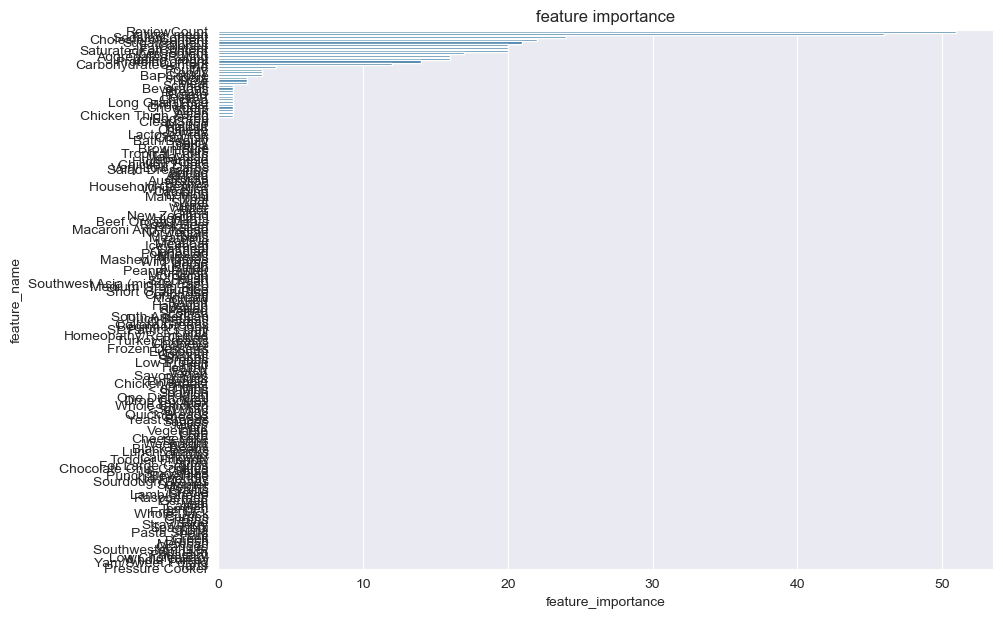

In [99]:
plt.figure(figsize=(10, 7))
df_plt = pd.DataFrame({'feature_name': features, 'feature_importance':
model.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)
sns.barplot(x="feature_importance", y="feature_name", data=df_plt)
plt.title('feature importance')

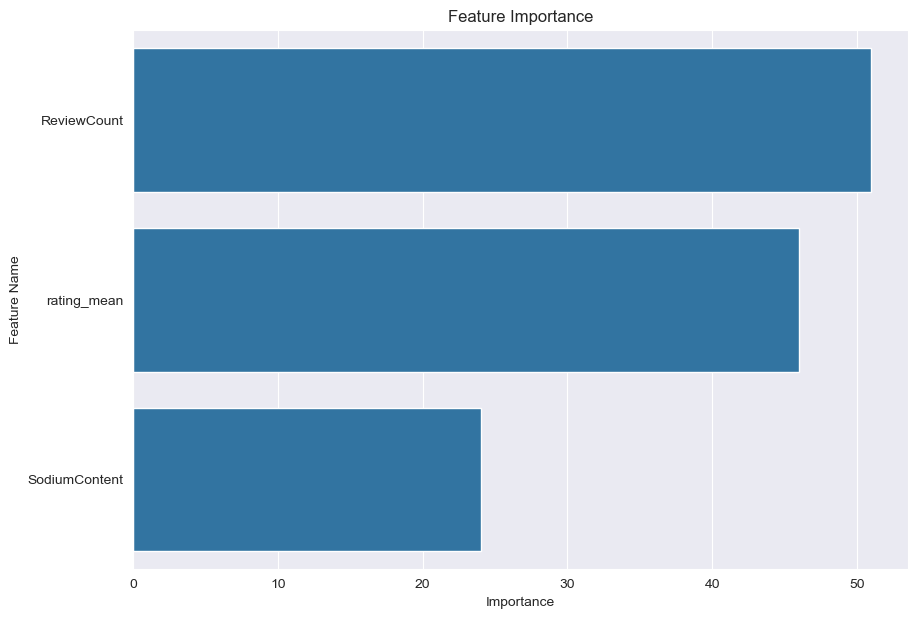

In [100]:
plt.figure(figsize=(10, 7))
df_plt = pd.DataFrame({'feature_name': features, 'feature_importance': model.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)

# Set the number of top features to display
top_n = 3

# Filter the DataFrame to include only the top N features
df_plt = df_plt.head(top_n)

# Plotting the bar plot
sns.barplot(x="feature_importance", y="feature_name", data=df_plt)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

In [101]:
def predict(user_df, top_k, recipe):
    user_recipe_df = recipe.merge(user_df, left_on="RecipeId", right_on="recipe_id")
    user_recipe_df = make_category(user_recipe_df,category_unique_values)
    excludes_category = list(np.array(category_unique_values)[np.nonzero([user_recipe_df[category_unique_values].sum(axis=0) < 1])[1]])

    pred_df = user_recipe_df.copy()
    pred_df = pred_df.loc[pred_df[excludes_category].sum(axis=1)==0]

    for col in user_df.columns:
        if col in features:
            pred_df[col] = user_df[col].values[0]

    preds = model.predict(pred_df[features])
    topk_idx = np.argsort(preds)[::-1][:top_k]
    recommend_df = pred_df.iloc[topk_idx].reset_index(drop=True)
    print('---------- Recommend ----------')
    for i, row in recommend_df.iterrows():
        print(f'{i+1}: {row["Name"]}')

    return recommend_df

In [102]:
user_id = 236470
user_df = df_review.copy().loc[df_review['user_id']== user_id]
user_df = make_user_feature(user_df)
predict(user_df, 10, df_recipe)

---------- Recommend ----------
1: peanut butter and jelly puffs for small and big kids
2: scottish shortbread
3: sugar free cranberry sauce
4: jerk pork chops
5: janies carrot cake
6: sloppy toms sloppy joes with turkey
7: carrot cake
8: chocolate chip banana muffins
9: banana streusel muffins
10: red lobster cheddar bay biscuits copycat


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,Polynesian,Mashed Potatoes,Wild Game,Indian,Austrian,Peanut Butter,Pumpkin,Moroccan,Polish,Pressure Cooker
0,163451,peanut butter and jelly puffs for small and bi...,247940,OhSheila,PT15M,PT25M,PT40M,2006-04-10T18:49:00Z,My kids love these! They also love to help me ...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
1,14865,scottish shortbread,23728,Steve_G,PT1H,PT10M,PT1H10M,2001-11-26T10:57:00Z,Make and share this Scottish Shortbread recipe...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
2,15806,sugar free cranberry sauce,22973,Darlene Summers,PT8M,PT5M,PT13M,2001-12-14T15:40:00Z,I use this for my diabetic friends who come on...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
3,254053,jerk pork chops,303700,Lorrie in Montreal,PT20M,PT5M,PT25M,2007-09-19T21:15:00Z,A 30 minute home-cooked meal for all of us coo...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
4,185181,janies carrot cake,80937,Just Janie,PT40M,PT20M,PT1H,2006-09-07T21:33:00Z,I like this incredibly moist carrott cake beca...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
5,321602,sloppy toms sloppy joes with turkey,213983,MakeMineCadburys,PT25M,PT5M,PT30M,2008-08-27T00:24:00Z,Make and share this Sloppy Toms (Sloppy Joes W...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
6,54,carrot cake,1535,Marg CaymanDesigns,PT50M,PT45M,PT1H35M,1999-09-13T15:20:00Z,This is one of the few recipes my husband ever...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
7,9979,chocolate chip banana muffins,7308,Kat2355,PT25M,PT10M,PT35M,2001-07-05T09:48:00Z,Make and share this Chocolate Chip Banana Muff...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
8,55262,banana streusel muffins,2310,Geema,PT20M,PT15M,PT35M,2003-03-01T20:04:00Z,Make and share this Banana Streusel Muffins re...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0
9,9494,red lobster cheddar bay biscuits copycat,11295,ThatJodiGirl,PT8M,PT10M,PT18M,2001-06-18T11:24:00Z,Make and share this Red Lobster Cheddar Bay Bi...,https://img.sndimg.com/food/image/upload/w_555...,...,0,0,0,0,0,0,0,0,0,0


In [103]:
dir = Path(os.path.abspath('')).parent / "data" / "model"
file = open(str(dir) + "/recommend_model.pkl", "wb")
pickle.dump(model, file)
